In [98]:
from qutip import *
from numpy import pi
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
# sta_1 = Qobj([[1],[0],[0],[0]])
# sta_2 = Qobj([[0],[1],[0],[0]])
# sta_3 = Qobj([[0],[0],[1],[0]])
# sta_4 = Qobj([[0],[0],[0],[1]])

In [100]:
# s_1 = Qobj([[1],[0]])
# s_2 = Qobj([[0],[1]])

In [101]:
N = 1/np.sqrt(8)
N1 = 1/np.sqrt(2)
N2 = 1/2

I_2 = Qobj([[1,0],[0,1]])
# z = complex(0,0.25*np.pi)

result = []
plot_source1 = []
plot_source2 = []
variables = []

In [102]:
def outer_product(s1,s2):
    #the input state should be ket
    dim1 = s1.shape[0]
    dim2 = s2.shape[0]
    if dim1 == dim2:
        sm = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
        #sm = [[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0]]
        for i in range(dim1):
            for j in range(dim2):
                sm[i][j] = 2*s1[i][0][0]*np.conj(s2[j][0][0])
                if i == j:
                    sm[i][j] = sm[i][j]-1
        return(sm)
    else:
        return("dim error")
        

In [103]:
for l in range(100):
    result.append([ ])
    z = complex(0,0.01*l*np.pi)
    phase = np.exp(z)
    
    sta_1 = Qobj([[1],[0],[0],[0]])
    sta_2 = Qobj([[0],[1],[0],[0]])
    sta_3 = Qobj([[0],[0],[1],[0]])
    sta_4 = Qobj([[0],[0],[0],[1]])
    
    s_1 = Qobj([[1],[0]])
    s_2 = Qobj([[0],[1]])
    
    st_1 =N*phase *tensor(s_1,sta_1)
    st_2 =N*phase *tensor(s_2,sta_1)
    st_3 =N* tensor(s_1,sta_2)
    st_4 =N* tensor(s_2,sta_2)
    st_5 =N* tensor(s_1,sta_3)
    st_6 =N* tensor(s_2,sta_3)
    st_7 =N* tensor(s_1,sta_4)
    st_8 =N* tensor(s_2,sta_4 )
    
    R_1 = N1 *(s_1 + s_2)
    s = N2*(sta_1+sta_2+sta_3+sta_4)
    s_t = st_1+st_2+st_3+st_4+st_5+st_6+st_7+st_8
    
    U_w = Qobj([[-1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
    U_w = tensor(I_2, U_w)
    
    sm = outer_product(s,s)
    U_s= Qobj(sm)
    U_s = tensor(I_2, U_s)
    
    sw = U_w * s_t
    ss = U_s * sw
    
    a1 = ss[0][0][0]
    a2 = ss[1][0][0]
    a3 = ss[2][0][0]
    a4 = ss[3][0][0]
    a5 = ss[4][0][0]
    a6 = ss[5][0][0]
    a7 = ss[6][0][0]
    a8 = ss[7][0][0]
    
    a1c = np.conj(a1)
    a2c = np.conj(a2)
    a3c = np.conj(a3)
    a4c = np.conj(a4)
    a5c = np.conj(a5)
    a6c = np.conj(a6)
    a7c = np.conj(a7)
    a8c = np.conj(a8)
    
    p1 = a1 * a1c
    p2 = a2 * a2c
    p3 = a3 * a3c
    p4 = a4 * a4c
    p5 = a5 * a5c
    p6 = a6 * a6c
    p7 = a7 * a7c
    p8 = a8 * a8c
    
    result[l].append(p1)
    result[l].append(p2)
    result[l].append(p3)
    result[l].append(p4)
    result[l].append(p5)
    result[l].append(p6)
    result[l].append(p7)
    result[l].append(p8)
    
    plot_source1.append(p1)
    plot_source2.append(p2)
    variables.append(l*0.01*np.pi)

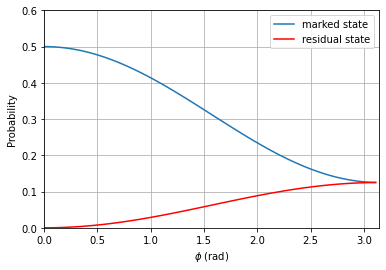

In [114]:
l1, = plt.plot(variables,plot_source1)
l2, = plt.plot(variables, plot_source2,color='red')
plt.legend(handles = [l1,l2],labels=['marked state','residual state'],loc='best')
plt.axis([0,np.pi,0,0.6])
plt.xlabel('$\phi$ (rad)')
plt.ylabel('Probability')
plt.grid(True)


plt.show()